<a href="https://colab.research.google.com/github/NicolasKlaue/Perceptron-to-classify-iris-types/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

iris = datasets.load_iris()
print(iris.target_names)
print(np.bincount(iris.target))
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
[50 50 50]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


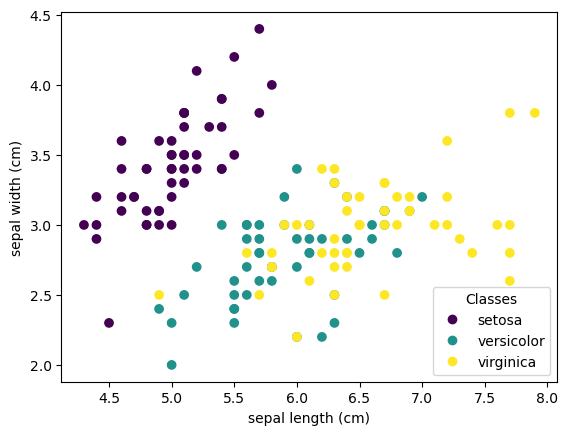

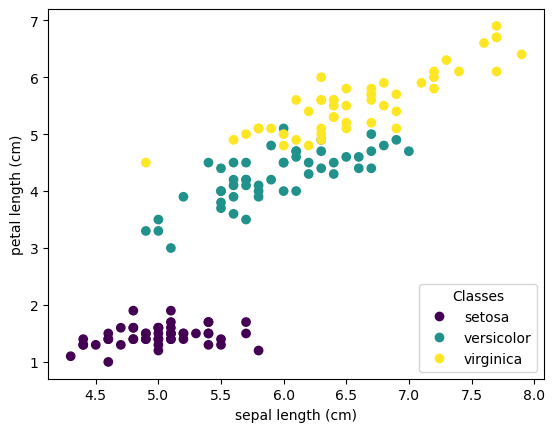

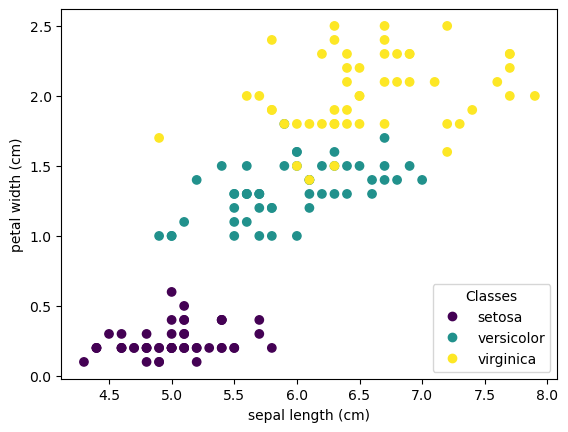

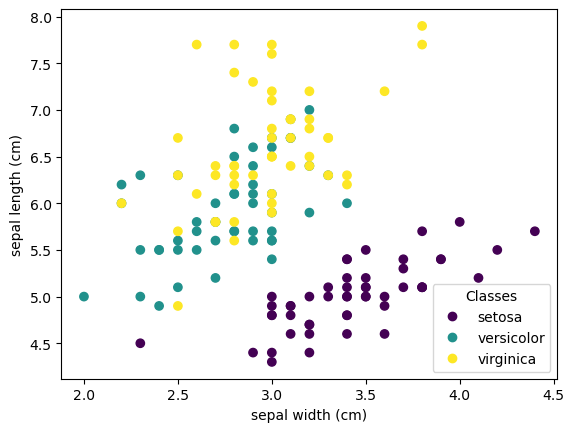

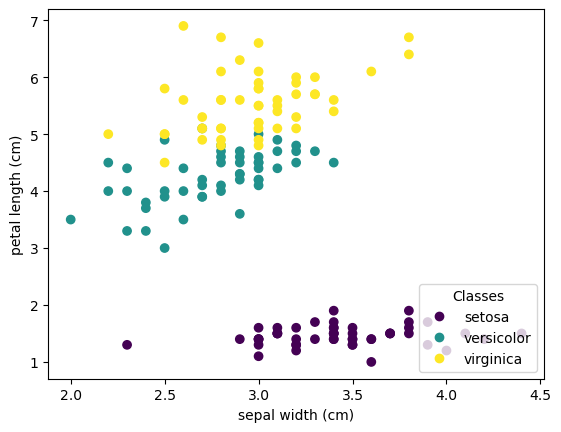

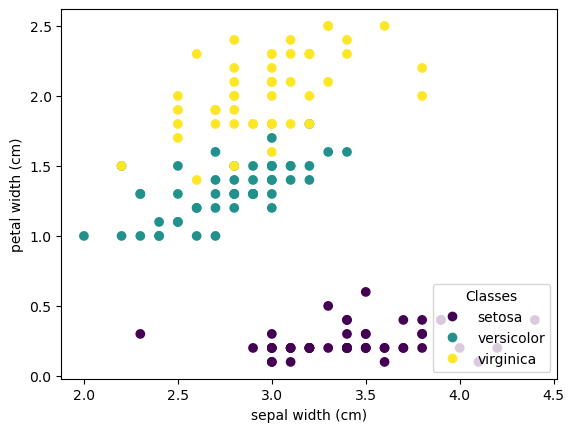

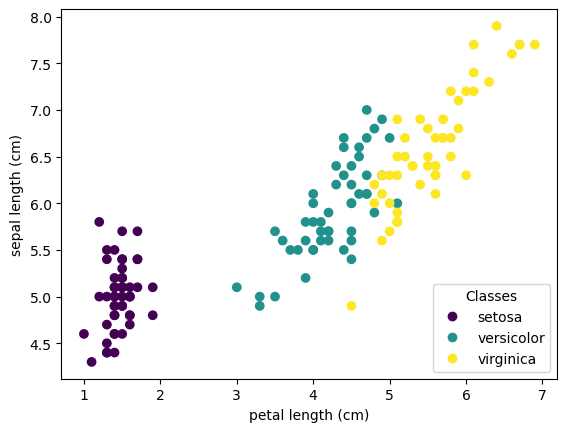

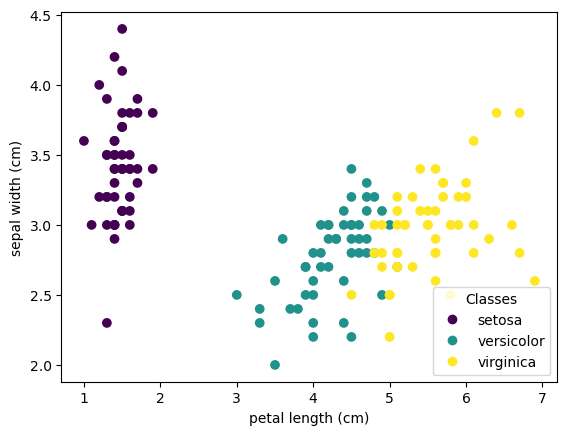

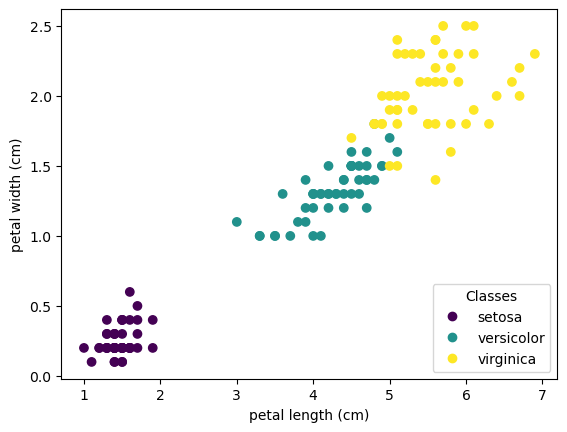

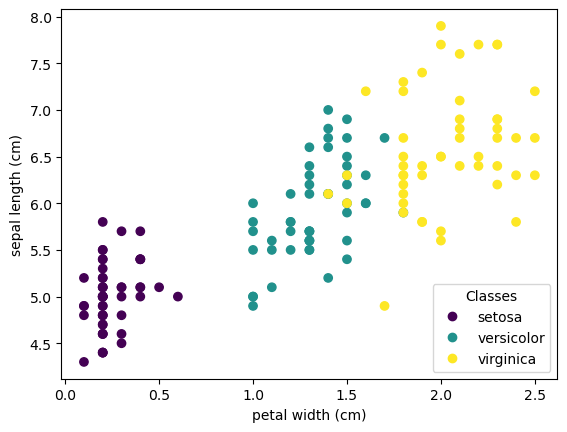

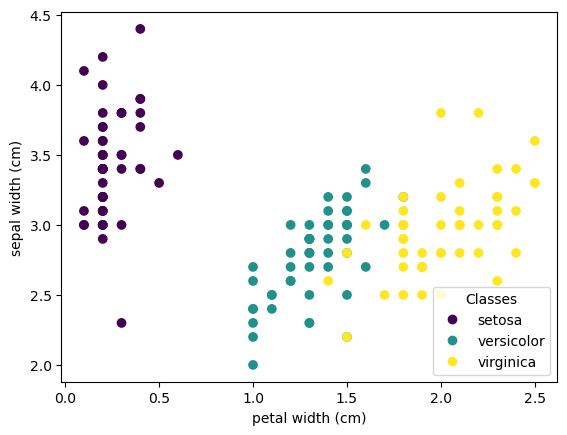

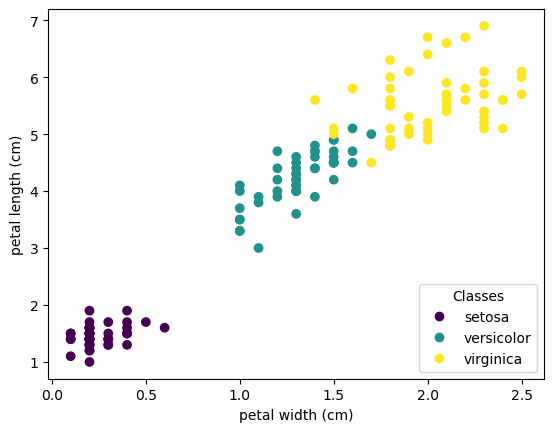

In [2]:
import matplotlib.pyplot as plt

for i in range(4):
  for j in range(4):
    if i != j:
      _, ax = plt.subplots()
      scatter = ax.scatter(
          iris.data[:, i], iris.data[:, j], c=iris.target)
      ax.set(xlabel=iris.feature_names[i],
             ylabel=iris.feature_names[j])
      _ = ax.legend(
          scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
        )

In [3]:
data, labels = iris.data, iris.target
#We have choosen to eliminate versicolor as we can only classify between two classes in a perceptron and Setosa and virginica are the easiest to classify based on petal width and lenght
versicolor_index = np.where(iris.target_names == "versicolor")[0][0]
filtered_data = [data[i] for i in range(len(data)) if labels[i] not in [versicolor_index]]
filtered_labels = [labels[i] for i in range(len(labels)) if labels[i] not in [versicolor_index]]

#Guarantee dimensionality of x is correct
filtered_data = [filtered_data[i][2:] for i in range(len(filtered_data))]


filtered_labels = [0 if label == 0 else 1 for label in filtered_labels]

#Division
setosa_index =0
setosa_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [setosa_index]]
setosa_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [setosa_index]]
setosa_filtered_data = np.array(setosa_filtered_data, dtype=np.float32)
setosa_filtered_labels = np.expand_dims(np.array(setosa_filtered_labels, dtype=np.float32), axis=1)


virginica_index = 1
virginica_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [virginica_index]]
virginica_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [virginica_index]]
virginica_filtered_data = np.array(virginica_filtered_data, dtype=np.float32)
virginica_filtered_labels = np.expand_dims(np.array(virginica_filtered_labels, dtype=np.float32), axis=1)

train_split, test_split = 0.7, 0.3
setosa_X_train, setosa_X_test = np.split(setosa_filtered_data, [int(setosa_filtered_data.shape[0] * train_split)])
setosa_y_train, setosa_y_test = np.split(setosa_filtered_labels, [int(setosa_filtered_labels.shape[0] * train_split)])

virginica_X_train, virginica_X_test = np.split(virginica_filtered_data, [int(virginica_filtered_data.shape[0] * train_split)])
virginica_y_train, virginica_y_test = np.split(virginica_filtered_labels, [int(virginica_filtered_labels.shape[0] * train_split)])

#print(len(setosa_filtered_data))
#print(len(setosa_filtered_labels))
#print(len(virginica_filtered_data))
#print(len(virginica_filtered_labels))
#print("setosa_X_train shape:", setosa_X_train.shape)
#print("setosa_X_train type:", type(setosa_X_train))
#print("setosa_X_test shape:", setosa_X_test.shape)
#print("setosa_X_test type:", type(setosa_X_test))
#print("setosa_y_train shape:", setosa_y_train.shape)
#print("setosa_y_train type:", type(setosa_y_train))
#print("setosa_y_test shape:", setosa_y_test.shape)
#print("setosa_y_test type:", type(setosa_y_test))
#print("virginica_X_train shape:", virginica_X_train.shape)
#print("virginica_X_train type:", type(virginica_X_train))
#print("virginica_X_test shape:", virginica_X_test.shape)
#print("virginica_X_test type:", type(virginica_X_test))
#print("virginica_y_train shape:", virginica_y_train.shape)
#print("virginica_y_train type:", type(virginica_y_train))
#print("virginica_y_test shape:", virginica_y_test.shape)
#print("virginica_y_test type:", type(virginica_y_test))

In [4]:
X_test, X_train = np.concatenate([setosa_X_test,virginica_X_test],0),np.concatenate([setosa_X_train,virginica_X_train],0)
y_test, y_train = np.concatenate([setosa_y_test,virginica_y_test],0),np.concatenate([setosa_y_train,virginica_y_train],0)
#print("X_train shape:", X_train.shape)
#print("X_train type:", type(X_train))
#print("X_test shape:", X_test.shape)
#print("X_test type:", type(X_test))
#print("y_train shape:", y_train.shape)
#print("y_train type:", type(y_train))
#print("y_test shape:", y_test.shape)
#print("y_test type:", type(y_test))

In [5]:
class Step:

  def __init__(
          self,
          threshold=0):

    self.__threshold__ = threshold

  def transform(
          self,
          x):

    return 1 if x >= self.__threshold__ else 0


class Perceptron:

     def __init__(self, units, activation):
        self.weights = np.random.normal(size=(units, 1)).astype(np.float32)
        self.bias = np.zeros(1, dtype=np.float32)
        self.activation = activation

     def predict(
          self,
          X):

          X = np.reshape(X, (self.weights.shape[1], self.weights.shape[0]))

          linear_output = np.zeros((X.shape[0], 1), dtype=np.float32)
          for i in range(X.shape[0]):
               for j in range(X.shape[1]):
                    linear_output[i] += X[i][j] * self.weights[j]
               linear_output[i] += self.bias


          prediction = self.activation.transform(linear_output)

          return prediction

     def fit(
          self,
          X,
          y,
          epochs=10,
          learning_rate=0.01):

          for epoch in range(1, epochs):

               loss = 0

               for i in range(X.shape[0]):

                    sample = np.reshape(
                         X[i], (self.weights.shape[0], self.weights.shape[1]))

                    prediction = self.predict(sample)
                    error = y[i] - prediction
                    loss += abs(error)

                    # Compute deltas
                    dweights = learning_rate * error * sample
                    dbias = learning_rate * error
                    self.weights += dweights
                    self.bias += dbias
                    if i == X.shape[0]-1:
                         print("\n\nweights: "+ str(self.weights) + "\n bias: " + str(self.bias))

                    loss /= X.shape[0]

               if (epoch % 10) == 0 or (epoch == epochs - 1):
                    print(f"Epoch {epoch} with loss {loss}")

In [6]:
input_size = X_test.shape[1]
output_size = y_test.shape[1]

learning_rate = 0.01

perceptron = Perceptron(
    units=input_size,
    activation=Step())

perceptron.fit(
    X_train,
    y_train,
    epochs=60,
    learning_rate=learning_rate)



weights: [[ 0.26976514]
 [-0.4619633 ]]
 bias: [0.05999999]


weights: [[ 0.23376514]
 [-0.4239633 ]]
 bias: [-0.05]


weights: [[ 0.25976515]
 [-0.37496334]]
 bias: [-0.10999998]


weights: [[ 0.23376514]
 [-0.34896335]]
 bias: [-0.18]


weights: [[ 0.25276515]
 [-0.31096336]]
 bias: [-0.22000003]


weights: [[ 0.22076516]
 [-0.29696336]]
 bias: [-0.27]


weights: [[ 0.22976516]
 [-0.27796337]]
 bias: [-0.29]


weights: [[ 0.22976516]
 [-0.25896338]]
 bias: [-0.30999997]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]
Epoch 10 with loss [0.]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.32999995]


weights: [[ 0.19576517]
 [-0.26196337]]
 bias: [-0.329

In [7]:
for i in range(X_train.shape[0]):
  result = perceptron.predict(X_train[i])
  print(str(int(X_train[i][0])) + ' and ' + str(int(X_train[i][1])) + " = " + str(result)  + " expected = " + str(y_train[i][0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5

In [8]:
for i in range(X_test.shape[0]):

  result = perceptron.predict(X_test[i])

  input = X_test[i]
  result = "1" if result > 0.5 else "0"

  print(str(int(input[0])) + ' and ' + str(int(input[1])) + " = " + result + " expected = " + str(y_test[i][0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
4 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0


[Text(0.5, 0, 'petal length (cm)'), Text(0, 0.5, 'petal width (cm)')]

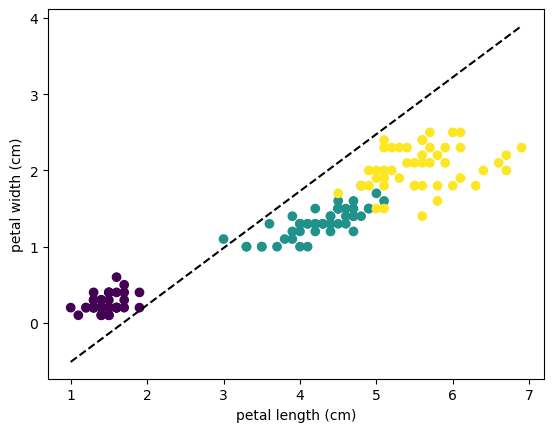

In [9]:
w = perceptron.weights
b = perceptron.bias
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)

x_values = np.linspace(iris.data[:, 2].min(), iris.data[:, 2].max())
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, linestyle="--", color='black')

ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])

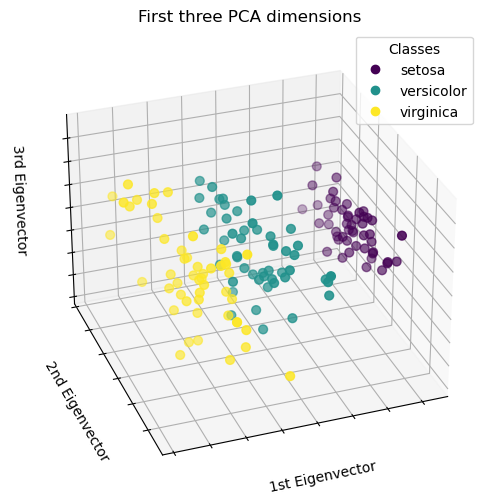

In [27]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

# Add the legend
labels = iris.target_names
ax = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)
plt.show()

# Explanation of the three-input perceptron
As we have made a transformation that joins all the previous inputs we will try to make a perceptron with these inputs

As we can see the most obvious separation is between setosa and virginica so this is th eone that we will be making

In [40]:
data, labels = X_reduced, iris.target
#We have choosen to eliminate versicolor as we can only classify between two classes in a perceptron and Setosa and virginica are the easiest to classify based on petal width and lenght
versicolor_index = np.where(iris.target_names == "versicolor")[0][0]
filtered_data = [data[i] for i in range(len(data)) if labels[i] not in [versicolor_index]]
filtered_labels = [labels[i] for i in range(len(labels)) if labels[i] not in [versicolor_index]]


filtered_labels = [0 if label == 0 else 1 for label in filtered_labels]

#Division
setosa_index =0
setosa_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [setosa_index]]
setosa_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [setosa_index]]
setosa_filtered_data = np.array(setosa_filtered_data, dtype=np.float32)
setosa_filtered_labels = np.expand_dims(np.array(setosa_filtered_labels, dtype=np.float32), axis=1)


virginica_index = 1
virginica_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [virginica_index]]
virginica_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [virginica_index]]
virginica_filtered_data = np.array(virginica_filtered_data, dtype=np.float32)
virginica_filtered_labels = np.expand_dims(np.array(virginica_filtered_labels, dtype=np.float32), axis=1)

train_split, test_split = 0.7, 0.3
setosa_X_train, setosa_X_test = np.split(setosa_filtered_data, [int(setosa_filtered_data.shape[0] * train_split)])
setosa_y_train, setosa_y_test = np.split(setosa_filtered_labels, [int(setosa_filtered_labels.shape[0] * train_split)])

virginica_X_train, virginica_X_test = np.split(virginica_filtered_data, [int(virginica_filtered_data.shape[0] * train_split)])
virginica_y_train, virginica_y_test = np.split(virginica_filtered_labels, [int(virginica_filtered_labels.shape[0] * train_split)])


X_test, X_train = np.concatenate([setosa_X_test,virginica_X_test],0),np.concatenate([setosa_X_train,virginica_X_train],0)
y_test, y_train = np.concatenate([setosa_y_test,virginica_y_test],0),np.concatenate([setosa_y_train,virginica_y_train],0)

In [43]:
input_size = X_test.shape[1]
output_size = y_test.shape[1]

learning_rate = 0.01

perceptron = Perceptron(
    units=input_size,
    activation=Step())

perceptron.fit(
    X_train,
    y_train,
    epochs=60,
    learning_rate=learning_rate)



weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]
Epoch 10 with loss [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights: [[ 1.3141946 ]
 [-0.4051322 ]
 [-0.07355577]]
 bias: [0.]


weights:

In [44]:
for i in range(X_train.shape[0]):
  result = perceptron.predict(X_train[i])
  print(str(int(X_train[i][0])) + ' , ' + str(int(X_train[i][1])) + ' and ' + str(int(X_train[i][2])) + " = " + str(result)  + " expected = " + str(y_train[i][0]))
  

-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-3 , 0 and 0 = 0 expected = 0.0
-2 , 1 and 0 = 0 expected = 0.0
-2 , 1 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-3 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 a

In [46]:
for i in range(X_test.shape[0]):

  result = perceptron.predict(X_test[i])

  input = X_test[i]
  result = "1" if result > 0.5 else "0"

  print(str(int(X_test[i][0])) + ' , ' + str(int(X_test[i][1])) + ' and ' + str(int(X_test[i][2])) + " = " + str(result)  + " expected = " + str(y_test[i][0]))


-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
-2 , 0 and 0 = 0 expected = 0.0
3 , 0 and 0 = 1 expected = 1.0
2 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
2 , 0 and 0 = 1 expected = 1.0
2 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
2 , 0 and 0 = 1 expected = 1.0
2 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0
1 , 0 and 0 = 1 expected = 1.0


In [56]:

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

# Add the legend
labels = iris.target_names
ax = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)
plt.show()

AttributeError: 'Legend' object has no attribute 'scatter'